In [1]:
from functions import *
from bayes_opt import BayesianOptimization

In [2]:
n=7
T=0.1
t_max=10
interpolator_kind='cubic'

In [3]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    n_random_models = 1

    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [4]:
pbounds = {'x1': (0,4), 'x2': (0,4), 'x3': (0,4)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [5]:
optimizer.maximize(
    init_points=10,
    n_iter=1000,
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | 0.001876  | 1.668     | 2.881     | 0.0004575 |


| 2         | 0.01437   | 1.209     | 0.587     | 0.3694    |


| 3         | 0.01961   | 0.745     | 1.382     | 1.587     |


| 4         | 0.02763   | 2.155     | 1.677     | 2.741     |


| 5         | 0.004984  | 0.8178    | 3.512     | 0.1096    |


| 6         | 0.02687   | 2.682     | 1.669     | 2.235     |


| 7         | 0.0002173 | 0.5615    | 0.7924    | 3.203     |


| 8         | 0.01195   | 3.873     | 1.254     | 2.769     |


| 9         | 0.007432  | 3.506     | 3.578     | 0.3402    |


| 10        | 0.001943  | 0.1562    | 0.6793    | 3.513     |


| 11        | 0.006209  | 2.235     | 2.637     | 2.521     |


| 12        | 0.05671   | 2.152     | 1.152     | 2.229     |


| 13        | 0.00478   | 2.197     | 0.6811    | 2.12      |


| 14        | 0.001252  | 0.9101    | 0.6224    | 3.789     |


| 15        | 0.04801   | 2.905     | 2.914     | 0.7788    |


| 16        | 0.003433  | 1.881     | 1.694     | 1.888     |


| 17        | 0.03058   | 3.822     | 2.656     | 1.883     |


| 18        | 0.02689   | 1.955     | 3.365     | 3.916     |


| 19        | 0.002966  | 1.29      | 3.054     | 3.428     |


| 20        | 0.004737  | 3.42      | 2.877     | 3.648     |


| 21        | 0.0286    | 2.708     | 2.192     | 1.533     |


| 22        | 0.004569  | 0.563     | 0.5575    | 1.267     |


| 23        | 0.00466   | 1.096     | 3.057     | 0.2675    |


| 24        | 0.03334   | 3.757     | 3.8       | 1.117     |


| 25        | 0.01487   | 2.393     | 0.4508    | 0.4671    |


| 26        | 0.03166   | 2.454     | 2.23      | 2.614     |


| 27        | 0.01102   | 0.06725   | 1.033     | 3.202     |


| 28        | 0.001115  | 1.249     | 2.185     | 3.307     |


| 29        | 0.006242  | 1.856     | 0.5434    | 2.269     |


| 30        | 0.05006   | 3.646     | 2.491     | 3.877     |


| 31        | 0.03757   | 2.116     | 1.168     | 2.283     |


| 32        | 0.00487   | 0.9202    | 0.2591    | 2.815     |


| 33        | 0.03376   | 2.186     | 1.194     | 2.213     |


| 34        | 0.06946   | 3.643     | 2.496     | 3.979     |


| 35        | 0.0136    | 3.357     | 1.674     | 1.184     |


| 36        | 0.05206   | 3.681     | 2.543     | 3.927     |


| 37        | 0.0678    | 3.595     | 2.52      | 3.956     |


| 38        | 0.01617   | 0.172     | 1.659     | 0.02117   |


| 39        | 0.02272   | 3.529     | 2.46      | 3.947     |


| 40        | 0.007864  | 3.615     | 2.626     | 3.957     |


| 41        | 0.0302    | 3.591     | 2.455     | 3.994     |


| 42        | 0.01159   | 0.4128    | 0.2286    | 1.479     |


| 43        | 0.01257   | 1.748     | 0.7739    | 0.3031    |


| 44        | 0.007068  | 3.699     | 2.593     | 3.915     |


| 45        | 0.07067   | 3.671     | 2.495     | 3.932     |


| 46        | 0.06101   | 3.716     | 2.505     | 3.982     |


| 47        | 0.03089   | 2.119     | 1.103     | 2.183     |


| 48        | 0.04762   | 2.986     | 2.89      | 0.7962    |


| 49        | 0.004644  | 2.947     | 2.962     | 0.8395    |


| 50        | 0.01589   | 1.019     | 3.382     | 0.5226    |


| 51        | 0.01962   | 3.019     | 0.9455    | 3.501     |


| 52        | 0.02448   | 2.949     | 2.848     | 0.7769    |


| 53        | 0.04153   | 3.243     | 2.989     | 3.558     |


| 54        | 0.03042   | 2.678     | 2.195     | 1.545     |


| 55        | 0.06493   | 3.752     | 2.502     | 3.94      |


| 56        | 0.01435   | 2.744     | 2.21      | 1.516     |


| 57        | 0.05962   | 3.659     | 2.542     | 3.919     |


| 58        | 0.04645   | 3.616     | 2.483     | 3.922     |


| 59        | 0.07019   | 3.722     | 2.49      | 3.904     |


| 60        | 0.04823   | 3.291     | 3.07      | 3.468     |


| 61        | 0.03553   | 3.68      | 2.458     | 3.92      |


| 62        | 0.004333  | 0.1688    | 2.631     | 3.965     |


| 63        | 0.03551   | 3.292     | 2.978     | 3.49      |


| 64        | 0.001587  | 0.4346    | 3.262     | 3.899     |


| 65        | 0.001372  | 3.487     | 0.7144    | 1.675     |


| 66        | 0.006965  | 0.2876    | 0.6244    | 2.71      |


| 67        | 0.06464   | 3.603     | 2.532     | 3.952     |


| 68        | 0.07058   | 3.779     | 2.458     | 3.922     |


| 69        | 0.0698    | 3.779     | 2.487     | 3.876     |


| 70        | 0.0005622 | 1.029     | 2.966     | 2.644     |


| 71        | 0.04333   | 3.729     | 2.458     | 3.898     |


| 72        | 0.004573  | 0.345     | 2.189     | 0.5801    |


| 73        | 0.02116   | 3.834     | 2.531     | 3.934     |


| 74        | 0.01082   | 3.806     | 2.375     | 3.856     |


| 75        | 0.06707   | 3.833     | 2.507     | 3.856     |


| 76        | 0.07361   | 3.686     | 2.47      | 3.975     |


| 77        | 0.06892   | 3.73      | 2.474     | 3.993     |


| 78        | 0.004305  | 2.969     | 2.934     | 0.7166    |


| 79        | 0.02382   | 2.023     | 3.96      | 1.61      |


| 80        | 0.01251   | 3.803     | 2.572     | 3.852     |


| 81        | 0.02091   | 1.833     | 3.877     | 2.276     |


| 82        | 0.06752   | 3.821     | 2.424     | 3.995     |


| 83        | 0.001544  | 0.5379    | 3.755     | 0.03788   |


| 84        | 0.06968   | 3.928     | 2.437     | 3.915     |


| 85        | 0.001808  | 0.7071    | 0.8369    | 2.122     |


| 86        | 0.01133   | 3.302     | 0.4796    | 2.233     |


| 87        | 0.02599   | 3.945     | 2.366     | 3.883     |


| 88        | 0.01174   | 2.046     | 2.843     | 3.732     |


| 89        | 0.05303   | 2.183     | 1.062     | 2.308     |


| 90        | 0.08757   | 3.324     | 3.361     | 2.15      |


| 91        | 0.05881   | 3.3       | 3.327     | 2.187     |


| 92        | 0.007318  | 3.17      | 0.5636    | 3.169     |


| 93        | 0.05312   | 3.864     | 2.422     | 3.925     |


| 94        | 0.002369  | 1.56      | 0.1412    | 0.6194    |


| 95        | 0.001764  | 0.1017    | 0.1445    | 0.1193    |


| 96        | 0.03085   | 3.366     | 3.381     | 2.221     |


| 97        | 0.05802   | 3.943     | 2.503     | 3.823     |


| 98        | 0.00815   | 3.989     | 2.514     | 3.925     |


| 99        | 0.06767   | 3.304     | 3.353     | 2.111     |


| 100       | 0.02968   | 3.869     | 2.426     | 3.832     |


| 101       | 0.04446   | 3.238     | 3.438     | 2.065     |


| 102       | 0.05453   | 3.298     | 3.397     | 2.152     |


| 103       | 0.01136   | 2.556     | 0.3966    | 0.574     |


| 104       | 0.07091   | 3.817     | 2.51      | 3.801     |


| 105       | 0.07204   | 3.784     | 2.535     | 3.724     |


| 106       | 0.00447   | 1.594     | 2.624     | 1.137     |


| 107       | 0.06934   | 3.761     | 2.544     | 3.649     |


| 108       | 0.0662    | 3.697     | 2.546     | 3.676     |


| 109       | 0.01795   | 3.412     | 3.24      | 2.185     |


| 110       | 0.003222  | 1.18      | 0.03402   | 0.623     |


| 111       | 0.01671   | 3.601     | 3.26      | 2.676     |


| 112       | 0.0263    | 3.721     | 2.448     | 3.874     |


| 113       | 0.02129   | 3.683     | 2.479     | 3.719     |


| 114       | 0.07137   | 3.898     | 2.501     | 3.722     |


| 115       | 0.0243    | 2.754     | 2.324     | 1.627     |


| 116       | 0.01845   | 3.847     | 2.579     | 3.762     |


| 117       | 0.04029   | 3.334     | 3.297     | 2.132     |


| 118       | 0.06334   | 3.705     | 2.58      | 3.743     |


| 119       | 0.01588   | 2.581     | 0.8183    | 2.634     |


| 120       | 0.07417   | 3.799     | 2.551     | 3.659     |


| 121       | 0.001071  | 0.7045    | 0.7826    | 0.5532    |


| 122       | 0.001922  | 3.617     | 0.2148    | 0.5355    |


| 123       | 0.06696   | 3.965     | 2.476     | 3.69      |


| 124       | 0.04483   | 3.746     | 2.549     | 3.561     |


| 125       | 0.06619   | 3.934     | 2.489     | 3.668     |


| 126       | 0.009202  | 3.738     | 2.663     | 3.658     |


| 127       | 0.01453   | 2.268     | 1.203     | 1.768     |


| 128       | 0.02196   | 3.92      | 2.45      | 3.615     |


| 129       | 0.03436   | 3.082     | 2.875     | 0.7902    |


| 130       | 0.04986   | 3.821     | 2.493     | 3.706     |


| 131       | 0.07814   | 3.893     | 2.557     | 3.574     |


| 132       | 0.04372   | 3.185     | 3.082     | 3.492     |


| 133       | 0.06839   | 3.359     | 3.386     | 2.092     |


| 134       | 0.003335  | 0.1619    | 2.131     | 1.756     |


| 135       | 0.07616   | 3.911     | 2.539     | 3.588     |


| 136       | 0.01815   | 3.993     | 2.579     | 3.636     |


| 137       | 0.01735   | 3.115     | 2.218     | 3.393     |


| 138       | 0.07594   | 3.87      | 2.552     | 3.627     |


| 139       | 0.03618   | 2.114     | 1.045     | 2.417     |


| 140       | 0.05067   | 3.977     | 2.515     | 3.775     |


| 141       | 0.0109    | 1.627     | 2.936     | 0.4179    |


| 142       | 0.0249    | 3.815     | 2.478     | 3.542     |


| 143       | 0.05559   | 3.314     | 3.413     | 2.061     |


| 144       | 0.07067   | 3.36      | 3.376     | 2.129     |


| 145       | 0.01864   | 1.638     | 3.39      | 2.137     |


| 146       | 0.05671   | 3.875     | 2.597     | 3.559     |


| 147       | 0.01291   | 2.116     | 0.566     | 3.717     |


| 148       | 0.03617   | 2.255     | 1.015     | 2.287     |


| 149       | 0.0149    | 2.334     | 2.153     | 0.8433    |


| 150       | 0.01289   | 3.389     | 3.434     | 2.048     |


| 151       | 0.03674   | 3.917     | 2.575     | 3.654     |


| 152       | 0.01896   | 3.274     | 3.112     | 3.56      |


| 153       | 0.03494   | 3.938     | 2.373     | 3.973     |


| 154       | 0.07039   | 3.927     | 2.543     | 3.526     |


| 155       | 0.03388   | 2.304     | 3.328     | 3.397     |


| 156       | 0.0252    | 3.918     | 2.409     | 3.722     |


| 157       | 0.03292   | 3.757     | 0.7062    | 0.9495    |


| 158       | 0.001191  | 1.833     | 3.284     | 1.195     |


| 159       | 0.07665   | 3.358     | 3.354     | 2.074     |


| 160       | 0.06165   | 3.235     | 3.379     | 2.002     |


| 161       | 0.06832   | 3.895     | 2.445     | 3.971     |


| 162       | 0.0644    | 3.152     | 3.413     | 1.976     |


| 163       | 0.08731   | 3.216     | 3.431     | 1.937     |


| 164       | 0.008555  | 3.197     | 3.288     | 1.901     |


| 165       | 0.01141   | 3.273     | 3.497     | 1.959     |


| 166       | 0.04139   | 3.219     | 3.137     | 3.393     |


| 167       | 0.005116  | 0.5406    | 1.224     | 3.701     |


| 168       | 0.05685   | 3.902     | 2.562     | 3.42      |


| 169       | 0.07009   | 3.755     | 2.516     | 3.802     |


| 170       | 0.004718  | 2.795     | 1.228     | 0.5228    |


| 171       | 0.003154  | 1.997     | 0.871     | 1.015     |


| 172       | 0.02239   | 3.951     | 2.478     | 3.468     |


| 173       | 0.0005047 | 1.027     | 2.768     | 2.942     |


| 174       | 0.005737  | 0.9372    | 0.9373    | 2.573     |


| 175       | 0.06589   | 3.095     | 3.472     | 2.007     |


| 176       | 0.02037   | 2.371     | 3.308     | 1.333     |


| 177       | 0.08499   | 3.155     | 3.456     | 1.919     |


| 178       | 0.0318    | 3.153     | 3.416     | 1.775     |


| 179       | 0.06484   | 3.24      | 3.393     | 1.935     |


| 180       | 0.01083   | 1.947     | 3.334     | 3.911     |


| 181       | 0.008175  | 3.394     | 0.5905    | 1.9       |


| 182       | 0.06436   | 3.302     | 3.364     | 2.023     |


| 183       | 0.01489   | 3.896     | 2.698     | 3.442     |


| 184       | 0.08549   | 3.103     | 3.452     | 1.947     |


| 185       | 0.009955  | 3.088     | 3.553     | 2.023     |


| 186       | 0.08336   | 3.221     | 3.449     | 1.892     |


| 187       | 0.02003   | 2.991     | 3.421     | 1.874     |


| 188       | 0.04153   | 3.701     | 2.967     | 2.149     |


| 189       | 0.009534  | 3.152     | 3.54      | 1.885     |


| 190       | 0.02293   | 3.879     | 2.549     | 3.279     |


| 191       | 0.06939   | 3.226     | 3.414     | 1.882     |


| 192       | 0.008325  | 0.05554   | 2.984     | 0.3474    |


| 193       | 0.07065   | 3.808     | 2.579     | 3.624     |


| 194       | 0.04905   | 3.37      | 3.102     | 3.338     |


| 195       | 0.02255   | 1.356     | 1.263     | 1.453     |


| 196       | 0.04138   | 3.359     | 3.049     | 3.401     |


| 197       | 0.0279    | 2.748     | 2.929     | 0.7304    |


| 198       | 0.07129   | 3.869     | 2.559     | 3.522     |


| 199       | 0.06679   | 3.074     | 3.439     | 1.971     |


| 200       | 0.002996  | 1.313     | 1.672     | 0.2846    |


| 201       | 0.0003581 | 0.5127    | 0.1439    | 1.326     |


| 202       | 0.03169   | 3.352     | 3.187     | 3.405     |


| 203       | 0.03523   | 2.219     | 1.164     | 2.355     |


| 204       | 0.05602   | 3.842     | 2.529     | 3.578     |


| 205       | 0.05053   | 3.865     | 2.242     | 0.9218    |


| 206       | 0.02674   | 3.876     | 2.304     | 1.018     |


| 207       | 0.04389   | 3.802     | 2.273     | 0.8676    |


| 208       | 0.0002791 | 3.106     | 2.988     | 3.453     |


| 209       | 0.05331   | 2.149     | 1.135     | 2.215     |


| 210       | 0.06847   | 3.762     | 2.571     | 3.701     |


| 211       | 0.0263    | 3.928     | 2.305     | 0.8077    |


| 212       | 0.01891   | 1.249     | 3.213     | 0.6086    |


| 213       | 0.02684   | 3.935     | 2.168     | 0.8833    |


| 214       | 0.04113   | 3.696     | 2.966     | 2.151     |


| 215       | 0.003156  | 3.743     | 2.143     | 0.952     |


| 216       | 0.008362  | 3.433     | 3.259     | 1.939     |


| 217       | 0.05155   | 3.932     | 2.606     | 3.489     |


| 218       | 0.009902  | 2.085     | 1.002     | 2.298     |


| 219       | 0.08778   | 3.124     | 3.422     | 2.077     |


| 220       | 0.0723    | 3.091     | 3.444     | 2.113     |


| 221       | 0.003488  | 1.0       | 0.9378    | 3.262     |


| 222       | 0.07486   | 3.152     | 3.437     | 1.918     |


| 223       | 0.006369  | 2.979     | 3.289     | 2.151     |


| 224       | 0.01516   | 3.289     | 3.019     | 3.252     |


| 225       | 0.0007999 | 2.5       | 0.5144    | 2.678     |


| 226       | 0.01291   | 3.597     | 2.5       | 3.576     |


| 227       | 0.03106   | 3.756     | 2.41      | 3.999     |


| 228       | 0.01657   | 3.136     | 3.469     | 2.13      |


| 229       | 0.0307    | 0.5086    | 0.2601    | 1.749     |


| 230       | 0.07398   | 2.98      | 3.458     | 2.033     |


| 231       | 0.04617   | 3.749     | 2.547     | 3.57      |


| 232       | 0.01239   | 0.2804    | 3.899     | 1.618     |


| 233       | 0.009507  | 1.04      | 0.8635    | 2.459     |


| 234       | 0.03531   | 2.97      | 3.503     | 2.089     |


| 235       | 0.0304    | 2.997     | 3.391     | 2.057     |


| 236       | 0.004271  | 0.2037    | 1.208     | 0.4034    |


| 237       | 0.05924   | 2.942     | 3.459     | 1.995     |


| 238       | 0.06329   | 3.029     | 3.492     | 1.996     |


| 239       | 0.08664   | 3.043     | 3.426     | 2.169     |


| 240       | 0.05706   | 3.075     | 3.371     | 2.263     |


| 241       | 0.04702   | 3.79      | 2.582     | 3.407     |


| 242       | 0.03545   | 3.073     | 3.341     | 2.201     |


| 243       | 0.07503   | 3.168     | 3.459     | 1.947     |


| 244       | 0.05501   | 3.1       | 3.384     | 2.088     |


| 245       | 0.04591   | 3.475     | 3.091     | 3.32      |


| 246       | 0.01519   | 3.033     | 3.504     | 2.356     |


| 247       | 0.00626   | 2.641     | 0.1054    | 1.989     |


| 248       | 0.02027   | 0.8235    | 2.489     | 3.215     |


| 249       | 0.01629   | 3.063     | 3.478     | 2.166     |


| 250       | 0.06469   | 2.966     | 3.426     | 2.171     |


| 251       | 0.0693    | 3.167     | 3.449     | 2.017     |


| 252       | 0.01113   | 0.6735    | 1.492     | 1.828     |


| 253       | 0.05351   | 2.84      | 3.467     | 2.011     |


| 254       | 0.005807  | 0.4683    | 3.104     | 3.073     |


| 255       | 0.06735   | 3.037     | 3.506     | 1.913     |


| 256       | 0.03662   | 2.886     | 3.385     | 2.212     |


| 257       | 0.08022   | 3.097     | 3.485     | 1.883     |


| 258       | 0.03054   | 0.9257    | 1.269     | 2.739     |


| 259       | 0.014     | 2.182     | 1.838     | 3.707     |


| 260       | 0.08307   | 3.159     | 3.345     | 2.374     |


| 261       | 0.03205   | 3.145     | 3.285     | 2.343     |


| 262       | 0.01712   | 3.12      | 3.45      | 2.447     |


| 263       | 0.04553   | 3.142     | 3.383     | 2.378     |


| 264       | 0.0007032 | 0.5333    | 3.25      | 3.217     |


| 265       | 0.01904   | 3.261     | 3.371     | 2.421     |


| 266       | 0.01391   | 0.8156    | 3.616     | 0.5894    |


| 267       | 0.01106   | 2.759     | 3.415     | 2.059     |


| 268       | 0.07331   | 2.878     | 3.499     | 1.957     |


| 269       | 0.009645  | 2.18      | 0.3461    | 1.816     |


| 270       | 0.02435   | 3.922     | 1.896     | 0.4897    |


| 271       | 0.05002   | 2.984     | 3.385     | 2.228     |


| 272       | 0.07941   | 3.048     | 3.454     | 2.08      |


| 273       | 0.02582   | 2.951     | 3.562     | 1.882     |


| 274       | 0.0585    | 3.095     | 3.41      | 2.018     |


| 275       | 0.06524   | 3.073     | 3.444     | 1.923     |


| 276       | 0.08368   | 3.087     | 3.447     | 2.042     |


| 277       | 0.01508   | 3.026     | 1.041     | 3.358     |


| 278       | 0.03253   | 3.461     | 3.199     | 3.249     |


| 279       | 0.02962   | 2.796     | 3.472     | 1.921     |


| 280       | 0.09049   | 3.195     | 3.349     | 2.341     |


| 281       | 0.01864   | 3.497     | 3.091     | 3.438     |


| 282       | 0.01694   | 3.958     | 3.736     | 0.2208    |


| 283       | 0.0691    | 3.278     | 3.323     | 2.294     |


| 284       | 0.08828   | 3.165     | 3.379     | 2.249     |


| 285       | 0.0762    | 3.881     | 2.549     | 3.577     |


| 286       | 0.01425   | 3.225     | 3.471     | 2.307     |


| 287       | 0.009913  | 2.872     | 3.617     | 2.003     |


| 288       | 0.05441   | 3.228     | 3.313     | 2.217     |


| 289       | 0.06238   | 3.264     | 3.358     | 2.313     |


| 290       | 0.01551   | 3.235     | 3.251     | 2.306     |


| 291       | 0.002167  | 1.653     | 1.265     | 0.5985    |


| 292       | 0.06938   | 3.312     | 3.454     | 1.84      |


| 293       | 0.04696   | 3.391     | 3.384     | 1.701     |


| 294       | 0.03021   | 2.532     | 3.342     | 1.151     |


| 295       | 0.03607   | 2.277     | 1.829     | 2.872     |


| 296       | 0.0701    | 3.29      | 3.399     | 1.844     |


| 297       | 0.009995  | 3.444     | 3.542     | 1.752     |


| 298       | 0.06075   | 3.175     | 3.388     | 2.282     |


| 299       | 0.02597   | 3.902     | 1.112     | 0.3798    |


| 300       | 0.001943  | 2.127     | 1.342     | 0.01954   |


| 301       | 0.0402    | 1.532     | 2.984     | 2.818     |


| 302       | 0.04838   | 3.566     | 3.065     | 3.221     |


| 303       | 0.04697   | 3.356     | 3.38      | 1.767     |


| 304       | 0.06771   | 3.077     | 3.397     | 2.187     |


| 305       | 0.04039   | 3.243     | 3.502     | 1.788     |


| 306       | 0.06694   | 3.512     | 3.043     | 3.136     |


| 307       | 0.008417  | 3.487     | 2.933     | 3.101     |


| 308       | 0.05892   | 3.546     | 3.076     | 3.068     |


| 309       | 0.07071   | 3.323     | 3.438     | 1.892     |


| 310       | 0.0409    | 2.691     | 1.007     | 1.009     |


| 311       | 0.05616   | 3.35      | 3.371     | 1.842     |


| 312       | 0.02524   | 2.866     | 3.381     | 2.211     |


| 313       | 0.009983  | 1.432     | 3.295     | 3.216     |


| 314       | 0.06557   | 3.61      | 3.0       | 3.169     |


| 315       | 0.07298   | 3.201     | 3.328     | 2.376     |


| 316       | 0.07878   | 3.155     | 3.351     | 2.338     |


| 317       | 0.06658   | 3.632     | 3.071     | 2.99      |


| 318       | 0.01451   | 3.716     | 2.95      | 3.077     |


| 319       | 0.04758   | 3.621     | 3.103     | 3.044     |


| 320       | 0.0534    | 3.184     | 3.336     | 2.195     |


| 321       | 0.0231    | 2.965     | 3.637     | 3.974     |


| 322       | 0.01652   | 3.701     | 3.108     | 2.419     |


| 323       | 0.008235  | 0.8012    | 2.877     | 1.154     |


| 324       | 0.01059   | 1.718     | 3.12      | 3.617     |


| 325       | 0.009632  | 3.625     | 3.002     | 2.918     |


| 326       | 0.05856   | 3.601     | 3.009     | 3.088     |


| 327       | 0.05704   | 3.043     | 3.403     | 2.142     |


| 328       | 0.009321  | 0.2332    | 1.842     | 1.697     |


| 329       | 0.05663   | 3.441     | 3.062     | 3.188     |


| 330       | 0.06953   | 3.118     | 3.475     | 1.952     |


| 331       | 0.07674   | 3.883     | 3.363     | 1.214     |


| 332       | 0.06349   | 3.836     | 3.433     | 1.146     |


| 333       | 0.04836   | 3.479     | 3.097     | 3.11      |


| 334       | 0.01263   | 3.808     | 3.318     | 1.255     |


| 335       | 0.07328   | 3.111     | 3.448     | 2.066     |


| 336       | 0.05412   | 3.801     | 3.438     | 1.068     |


| 337       | 0.06997   | 3.884     | 3.4       | 1.238     |


| 338       | 0.02703   | 1.957     | 3.472     | 3.133     |


| 339       | 0.06225   | 3.871     | 3.403     | 1.102     |


| 340       | 0.03297   | 3.144     | 3.784     | 1.124     |


| 341       | 0.06531   | 3.892     | 3.452     | 1.138     |


| 342       | 0.01136   | 3.511     | 0.9334    | 2.454     |


| 343       | 0.01329   | 1.535     | 1.104     | 3.748     |


| 344       | 0.05839   | 3.865     | 3.463     | 1.023     |


| 345       | 0.01181   | 3.071     | 1.139     | 0.1244    |


| 346       | 0.0317    | 3.973     | 3.294     | 1.253     |


| 347       | 0.01359   | 1.53      | 0.3103    | 3.957     |


| 348       | 0.006626  | 1.189     | 0.2504    | 3.907     |


| 349       | 0.0007324 | 2.974     | 2.589     | 2.281     |


| 350       | 0.06728   | 3.922     | 3.391     | 1.179     |


| 351       | 0.06213   | 3.6       | 2.536     | 3.965     |


| 352       | 0.0002484 | 0.3581    | 0.9297    | 1.956     |


| 353       | 0.02642   | 3.819     | 3.351     | 1.135     |


| 354       | 0.01378   | 0.6215    | 1.814     | 2.66      |


| 355       | 0.00222   | 3.952     | 3.525     | 1.712     |


| 356       | 0.03828   | 3.643     | 3.095     | 3.162     |


| 357       | 0.0797    | 3.214     | 3.361     | 2.225     |


| 358       | 0.05967   | 3.947     | 3.446     | 1.028     |


| 359       | 0.0225    | 3.942     | 3.517     | 1.039     |


| 360       | 0.04177   | 2.714     | 2.038     | 3.229     |


| 361       | 0.04926   | 3.853     | 2.423     | 3.923     |


| 362       | 0.08603   | 3.181     | 3.415     | 2.069     |


| 363       | 0.02438   | 3.908     | 3.379     | 0.9264    |


| 364       | 0.04194   | 3.499     | 2.527     | 1.766     |


| 365       | 0.03115   | 3.897     | 3.566     | 1.171     |


| 366       | 0.008729  | 0.3151    | 1.536     | 0.3154    |


| 367       | 0.05657   | 3.159     | 3.345     | 2.276     |


| 368       | 0.08003   | 3.135     | 3.453     | 1.876     |


| 369       | 0.006342  | 1.353     | 3.06      | 2.586     |


| 370       | 0.002715  | 0.7711    | 2.864     | 2.671     |


| 371       | 0.06026   | 3.983     | 3.394     | 1.118     |


| 372       | 0.04803   | 3.717     | 3.508     | 1.212     |


| 373       | 0.04277   | 3.668     | 3.133     | 2.948     |


| 374       | 0.06569   | 3.048     | 3.433     | 2.214     |


| 375       | 0.07898   | 3.304     | 3.432     | 1.903     |


| 376       | 0.02885   | 3.936     | 3.498     | 1.261     |


| 377       | 0.06458   | 3.93      | 3.381     | 1.098     |


| 378       | 0.008845  | 3.722     | 3.717     | 3.561     |


| 379       | 0.05731   | 3.551     | 3.124     | 2.92      |


| 380       | 0.04994   | 3.486     | 3.123     | 3.011     |


| 381       | 0.05859   | 3.202     | 3.405     | 2.198     |


| 382       | 0.03501   | 2.581     | 3.583     | 0.9873    |


| 383       | 0.05934   | 3.488     | 3.123     | 2.835     |


| 384       | 0.0006157 | 1.509     | 1.322     | 3.333     |


| 385       | 0.01191   | 3.459     | 2.998     | 2.795     |


| 386       | 0.02446   | 3.205     | 3.326     | 2.085     |


| 387       | 0.0001428 | 3.593     | 2.905     | 3.236     |


| 388       | 0.03558   | 3.431     | 3.196     | 2.956     |


| 389       | 0.001936  | 0.6549    | 0.4069    | 2.394     |


| 390       | 0.05046   | 3.258     | 3.468     | 1.894     |


| 391       | 0.06936   | 3.406     | 3.185     | 2.747     |


| 392       | 0.05617   | 3.449     | 3.145     | 2.718     |


| 393       | 0.006299  | 3.312     | 3.127     | 2.678     |


| 394       | 0.07101   | 3.801     | 3.462     | 1.216     |


| 395       | 0.02907   | 3.412     | 3.259     | 2.723     |


| 396       | 0.06735   | 3.759     | 3.472     | 1.271     |


| 397       | 0.05859   | 3.823     | 3.488     | 1.089     |


| 398       | 0.01015   | 3.406     | 0.9084    | 2.379     |


| 399       | 0.0005515 | 1.074     | 2.224     | 3.262     |


| 400       | 0.04097   | 3.476     | 3.203     | 2.822     |


| 401       | 0.008373  | 0.7181    | 3.337     | 1.562     |


| 402       | 0.08147   | 3.737     | 3.45      | 1.356     |


| 403       | 0.07345   | 3.724     | 3.446     | 1.419     |


| 404       | 0.08581   | 3.704     | 3.411     | 1.378     |


| 405       | 0.07913   | 3.618     | 3.442     | 1.358     |


| 406       | 0.08509   | 3.623     | 3.473     | 1.316     |


| 407       | 0.006606  | 0.07264   | 1.761     | 2.328     |


| 408       | 0.0122    | 0.816     | 1.99      | 0.5068    |


| 409       | 0.06996   | 3.676     | 3.475     | 1.354     |


| 410       | 0.00522   | 1.635     | 0.05073   | 3.945     |


| 411       | 0.09383   | 3.661     | 3.416     | 1.306     |


| 412       | 0.04977   | 3.658     | 1.353     | 0.5774    |


| 413       | 0.02213   | 3.535     | 3.552     | 1.345     |


| 414       | 0.05547   | 3.69      | 3.359     | 1.45      |


| 415       | 0.001786  | 3.591     | 3.354     | 1.225     |


| 416       | 0.01076   | 2.878     | 3.065     | 0.5688    |


| 417       | 0.04702   | 3.609     | 3.391     | 1.329     |


| 418       | 0.08345   | 3.678     | 3.467     | 1.293     |


| 419       | 0.02626   | 0.8525    | 1.469     | 3.456     |


| 420       | 0.02563   | 3.815     | 3.491     | 1.319     |


| 421       | 0.06901   | 3.664     | 3.452     | 1.242     |


| 422       | 0.01012   | 0.2372    | 3.814     | 3.843     |


| 423       | 0.08003   | 3.757     | 3.427     | 1.327     |


| 424       | 0.05236   | 3.762     | 3.517     | 0.9959    |


| 425       | 0.08834   | 3.792     | 3.386     | 1.409     |


| 426       | 0.01563   | 0.8038    | 1.691     | 3.721     |


| 427       | 0.0869    | 3.801     | 3.383     | 1.542     |


| 428       | 0.004591  | 0.6633    | 3.41      | 0.545     |


| 429       | 0.02533   | 3.777     | 3.284     | 1.531     |


| 430       | 0.08268   | 3.643     | 3.452     | 1.446     |


| 431       | 0.08432   | 3.776     | 3.417     | 1.445     |


| 432       | 0.09262   | 3.764     | 3.374     | 1.398     |


| 433       | 0.03037   | 3.676     | 3.461     | 1.546     |


| 434       | 0.01677   | 3.864     | 3.456     | 1.489     |


| 435       | 0.001596  | 0.4449    | 2.111     | 3.29      |


| 436       | 0.04008   | 3.77      | 3.424     | 1.57      |


| 437       | 0.09032   | 3.854     | 3.361     | 1.55      |


| 438       | 0.0002105 | 2.835     | 0.07464   | 2.111     |


| 439       | 0.01587   | 3.616     | 3.566     | 1.451     |


| 440       | 0.08239   | 3.755     | 3.36      | 1.455     |


| 441       | 0.05309   | 3.937     | 3.379     | 1.547     |


| 442       | 0.01022   | 0.3906    | 3.47      | 2.887     |


| 443       | 0.07791   | 3.699     | 3.426     | 1.341     |


| 444       | 0.06773   | 3.801     | 3.414     | 1.493     |


| 445       | 0.04695   | 3.893     | 3.368     | 1.657     |


| 446       | 0.03082   | 2.39      | 0.6224    | 1.15      |


| 447       | 0.02544   | 3.341     | 3.113     | 2.828     |


| 448       | 0.0179    | 3.617     | 1.239     | 0.5596    |


| 449       | 0.0254    | 3.471     | 3.11      | 3.313     |


| 450       | 0.08152   | 3.739     | 3.413     | 1.277     |


| 451       | 0.02443   | 3.607     | 1.48      | 0.5069    |


| 452       | 0.0571    | 3.811     | 3.328     | 1.456     |


| 453       | 0.03745   | 2.02      | 3.118     | 0.8608    |


| 454       | 0.09504   | 3.88      | 3.356     | 1.503     |


| 455       | 0.09165   | 3.529     | 3.462     | 1.461     |


| 456       | 0.04035   | 1.993     | 3.103     | 3.222     |


| 457       | 0.003176  | 3.812     | 0.3813    | 3.579     |


| 458       | 0.08775   | 3.52      | 3.452     | 1.391     |


| 459       | 0.1001    | 3.507     | 3.429     | 1.484     |


| 460       | 0.00109   | 1.064     | 2.412     | 2.762     |


| 461       | 0.07111   | 3.547     | 3.407     | 1.446     |


| 462       | 0.002979  | 2.889     | 0.3417    | 3.172     |


| 463       | 0.002131  | 2.849     | 1.686     | 2.601     |


| 464       | 0.04956   | 3.499     | 3.487     | 1.559     |


| 465       | 0.09601   | 3.467     | 3.443     | 1.446     |


| 466       | 0.0757    | 3.871     | 3.318     | 1.509     |


| 467       | 0.02582   | 2.846     | 3.749     | 0.8011    |


| 468       | 0.004746  | 3.394     | 3.35      | 1.5       |


| 469       | 0.06669   | 3.492     | 3.423     | 1.417     |


| 470       | 0.01157   | 2.086     | 2.041     | 0.1225    |


| 471       | 0.01893   | 3.457     | 2.464     | 2.748     |


| 472       | 0.01982   | 1.692     | 1.369     | 1.435     |


| 473       | 0.04937   | 3.495     | 2.985     | 3.29      |


| 474       | 0.07098   | 3.864     | 3.389     | 1.521     |


| 475       | 0.05528   | 2.971     | 3.201     | 2.169     |


| 476       | 0.0248    | 1.07      | 1.112     | 2.314     |


| 477       | 0.06956   | 3.935     | 2.445     | 3.905     |


| 478       | 0.02841   | 3.552     | 3.296     | 0.4471    |


| 479       | 0.0918    | 3.456     | 3.465     | 1.381     |


| 480       | 0.01062   | 0.5411    | 1.551     | 2.696     |


| 481       | 0.002714  | 2.442     | 0.9562    | 0.7822    |


| 482       | 0.08969   | 3.435     | 3.464     | 1.496     |


| 483       | 0.07073   | 3.621     | 3.477     | 1.403     |


| 484       | 0.001578  | 0.165     | 3.176     | 0.6183    |


| 485       | 0.05219   | 3.296     | 3.069     | 3.501     |


| 486       | 0.05461   | 3.654     | 1.361     | 0.5629    |


| 487       | 0.04683   | 3.368     | 3.46      | 1.279     |


| 488       | 0.059     | 3.435     | 3.519     | 1.458     |


| 489       | 0.03608   | 2.999     | 3.115     | 2.1       |


| 490       | 0.04535   | 3.494     | 3.424     | 1.293     |


| 491       | 0.04279   | 3.723     | 3.654     | 0.9475    |


| 492       | 0.0886    | 3.627     | 3.425     | 1.402     |


| 493       | 0.001488  | 1.832     | 2.667     | 2.076     |


| 494       | 0.09786   | 3.605     | 3.418     | 1.446     |


| 495       | 0.007744  | 0.6694    | 1.594     | 2.151     |


| 496       | 0.06469   | 3.385     | 3.443     | 1.452     |


| 497       | 0.03525   | 3.72      | 3.548     | 0.8322    |


| 498       | 0.08993   | 3.435     | 3.468     | 1.321     |


| 499       | 0.001778  | 0.6983    | 1.799     | 1.863     |


| 500       | 0.003133  | 0.2643    | 2.609     | 2.664     |


| 501       | 0.1002    | 3.575     | 3.413     | 1.497     |


| 502       | 0.03974   | 3.603     | 3.36      | 1.486     |


| 503       | 0.09684   | 3.536     | 3.408     | 1.544     |


| 504       | 0.0312    | 3.566     | 2.139     | 1.724     |


| 505       | 0.03431   | 3.402     | 3.418     | 1.395     |


| 506       | 0.04209   | 3.437     | 3.569     | 1.272     |


| 507       | 0.008462  | 2.198     | 1.74      | 1.616     |


| 508       | 0.06161   | 3.511     | 3.495     | 1.476     |


| 509       | 0.0968    | 3.919     | 3.344     | 1.446     |


| 510       | 0.03466   | 3.478     | 3.358     | 1.661     |


| 511       | 0.02051   | 3.569     | 1.526     | 3.641     |


| 512       | 0.03387   | 2.279     | 3.174     | 2.334     |


| 513       | 0.07742   | 3.443     | 3.425     | 1.519     |


| 514       | 0.01249   | 3.09      | 3.973     | 0.1326    |


| 515       | 0.09462   | 3.992     | 3.334     | 1.354     |


| 516       | 0.05077   | 2.242     | 1.77      | 1.825     |


| 517       | 0.0861    | 3.89      | 3.335     | 1.415     |


| 518       | 0.0549    | 1.752     | 3.826     | 1.869     |


| 519       | 0.0825    | 3.926     | 3.306     | 1.52      |


| 520       | 0.09352   | 3.323     | 3.488     | 1.568     |


| 521       | 0.05612   | 3.94      | 3.305     | 1.385     |


| 522       | 0.08696   | 3.583     | 3.46      | 1.459     |


| 523       | 0.09391   | 3.601     | 3.429     | 1.518     |


| 524       | 0.08714   | 3.377     | 3.495     | 1.526     |


| 525       | 0.03778   | 3.39      | 3.509     | 1.612     |


| 526       | 0.08656   | 3.342     | 3.494     | 1.494     |


| 527       | 0.04435   | 3.221     | 3.567     | 1.522     |


| 528       | 0.02007   | 2.103     | 2.638     | 2.275     |


| 529       | 0.02243   | 3.959     | 3.452     | 1.361     |


| 530       | 0.05645   | 3.991     | 3.864     | 2.88      |


| 531       | 0.0009193 | 1.571     | 0.6005    | 2.833     |


| 532       | 0.01396   | 0.2932    | 0.3159    | 1.771     |


| 533       | 0.09999   | 3.433     | 3.443     | 1.508     |


| 534       | 0.08639   | 3.274     | 3.505     | 1.594     |


| 535       | 0.09258   | 3.235     | 3.48      | 1.676     |


| 536       | 0.09408   | 3.265     | 3.478     | 1.642     |


| 537       | 0.02454   | 3.495     | 3.029     | 3.974     |


| 538       | 0.01956   | 3.313     | 3.376     | 1.619     |


| 539       | 0.007284  | 0.5562    | 1.531     | 0.042     |


| 540       | 0.0151    | 3.302     | 3.564     | 1.568     |


| 541       | 0.002095  | 1.22      | 0.03735   | 3.935     |


| 542       | 0.07896   | 3.716     | 3.443     | 1.422     |


| 543       | 0.004762  | 2.646     | 1.432     | 0.2151    |


| 544       | 0.05154   | 3.296     | 3.447     | 1.506     |


| 545       | 0.01081   | 2.602     | 2.113     | 2.515     |


| 546       | 0.08663   | 3.112     | 3.53      | 1.65      |


| 547       | 0.09218   | 3.068     | 3.534     | 1.595     |


| 548       | 0.01003   | 3.116     | 3.628     | 1.603     |


| 549       | 0.009733  | 2.16      | 0.1099    | 3.533     |


| 550       | 0.0666    | 3.202     | 3.457     | 1.64      |


| 551       | 0.05075   | 3.143     | 3.462     | 1.639     |


| 552       | 0.08833   | 3.111     | 3.542     | 1.566     |


| 553       | 0.04711   | 2.948     | 3.904     | 3.917     |


| 554       | 0.01663   | 3.895     | 2.965     | 1.286     |


| 555       | 0.09642   | 3.594     | 3.402     | 1.575     |


| 556       | 0.09138   | 3.642     | 3.388     | 1.643     |


| 557       | 0.06484   | 3.008     | 3.518     | 1.575     |


| 558       | 0.04446   | 3.257     | 3.518     | 1.693     |


| 559       | 0.09356   | 3.58      | 3.383     | 1.617     |


| 560       | 0.00127   | 1.849     | 3.791     | 1.051     |


| 561       | 0.002892  | 1.122     | 3.672     | 3.325     |


| 562       | 0.02706   | 3.081     | 3.468     | 1.544     |


| 563       | 0.0009554 | 0.06572   | 1.54      | 0.1503    |


| 564       | 0.0639    | 3.96      | 3.388     | 1.447     |


| 565       | 0.04062   | 3.758     | 1.976     | 3.805     |


| 566       | 0.02456   | 3.559     | 3.469     | 1.656     |


| 567       | 0.0834    | 3.3       | 3.536     | 1.386     |


| 568       | 0.01549   | 2.76      | 2.544     | 0.669     |


| 569       | 0.02228   | 3.665     | 3.292     | 1.628     |


| 570       | 0.001129  | 0.2655    | 1.284     | 3.302     |


| 571       | 0.06096   | 3.385     | 3.439     | 1.462     |


| 572       | 0.07216   | 3.035     | 3.442     | 2.176     |


| 573       | 0.08962   | 3.433     | 3.467     | 1.505     |


| 574       | 3.509e-05 | 1.856     | 0.09326   | 1.119     |


| 575       | 0.02354   | 0.7225    | 1.613     | 2.795     |


| 576       | 0.08264   | 3.278     | 3.446     | 1.667     |


| 577       | 0.005119  | 1.739     | 0.08678   | 1.422     |


| 578       | 0.08614   | 3.048     | 3.517     | 1.679     |


| 579       | 0.08743   | 3.061     | 3.566     | 1.531     |


| 580       | 0.03211   | 3.402     | 3.563     | 1.382     |


| 581       | 0.004057  | 1.815     | 0.4182    | 3.91      |


| 582       | 0.008205  | 0.5566    | 3.378     | 0.99      |


| 583       | 0.09397   | 3.219     | 3.513     | 1.4       |


| 584       | 0.01155   | 1.447     | 0.2716    | 2.26      |


| 585       | 0.09009   | 3.638     | 3.352     | 1.707     |


| 586       | 0.08015   | 3.219     | 3.58      | 1.318     |


| 587       | 0.005937  | 2.617     | 1.886     | 1.841     |


| 588       | 0.05792   | 3.598     | 3.417     | 1.73      |


| 589       | 0.05965   | 3.258     | 3.5       | 1.273     |


| 590       | 0.04365   | 3.214     | 3.594     | 1.407     |


| 591       | 0.0211    | 3.154     | 3.47      | 1.335     |


| 592       | 0.08704   | 3.308     | 3.5       | 1.43      |


| 593       | 0.05139   | 3.718     | 3.382     | 1.769     |


| 594       | 0.04143   | 1.813     | 3.95      | 1.015     |


| 595       | 0.005094  | 1.391     | 2.009     | 3.098     |


| 596       | 0.07717   | 3.072     | 3.493     | 1.704     |


| 597       | 0.08153   | 3.11      | 3.558     | 1.483     |


| 598       | 0.01338   | 2.983     | 3.601     | 1.728     |


| 599       | 0.06651   | 3.264     | 3.488     | 1.374     |


| 600       | 0.01474   | 3.249     | 3.67      | 1.193     |


| 601       | 0.0612    | 2.982     | 3.544     | 1.452     |


| 602       | 0.01093   | 3.027     | 3.664     | 1.441     |


| 603       | 0.03112   | 3.988     | 3.256     | 1.437     |


| 604       | 0.05227   | 2.245     | 1.16      | 2.079     |


| 605       | 0.05081   | 3.152     | 3.49      | 1.466     |


| 606       | 0.009634  | 0.8616    | 3.042     | 0.7735    |


| 607       | 0.09229   | 3.983     | 3.358     | 1.404     |


| 608       | 0.09866   | 3.233     | 3.5       | 1.474     |


| 609       | 0.07704   | 3.159     | 3.516     | 1.705     |


| 610       | 0.06435   | 3.865     | 3.398     | 1.102     |


| 611       | 0.08043   | 3.223     | 3.515     | 1.634     |


| 612       | 0.06614   | 3.264     | 3.452     | 1.585     |


| 613       | 0.007754  | 0.9314    | 3.266     | 2.437     |


| 614       | 0.01628   | 0.4525    | 2.997     | 3.567     |


| 615       | 0.03044   | 3.902     | 3.253     | 1.596     |


| 616       | 0.06263   | 3.983     | 3.401     | 1.123     |


| 617       | 0.02709   | 2.881     | 3.527     | 1.501     |


| 618       | 0.01843   | 3.55      | 3.297     | 1.699     |


| 619       | 0.03548   | 3.213     | 3.459     | 1.463     |


| 620       | 0.002136  | 3.95      | 2.45      | 0.6474    |


| 621       | 0.08016   | 3.726     | 3.418     | 1.277     |


| 622       | 0.004665  | 2.549     | 1.186     | 3.429     |


| 623       | 0.0348    | 2.887     | 3.12      | 2.215     |


| 624       | 0.01721   | 1.233     | 3.938     | 3.891     |


| 625       | 0.05596   | 3.889     | 3.935     | 2.846     |


| 626       | 0.09279   | 3.225     | 3.507     | 1.421     |


| 627       | 0.02122   | 3.882     | 3.801     | 2.781     |


| 628       | 0.008287  | 1.682     | 3.713     | 1.805     |


| 629       | 0.005087  | 0.6584    | 2.704     | 2.783     |


| 630       | 0.08984   | 3.61      | 3.363     | 1.659     |


| 631       | 0.05733   | 3.966     | 3.951     | 2.784     |


| 632       | 0.098     | 3.402     | 3.45      | 1.538     |


| 633       | 0.007943  | 0.7627    | 1.367     | 1.086     |


| 634       | 0.08001   | 3.912     | 3.379     | 1.341     |


| 635       | 0.04736   | 1.775     | 3.745     | 2.0       |


| 636       | 0.003441  | 1.223     | 0.1637    | 3.251     |


| 637       | 0.000479  | 2.162     | 1.006     | 0.9969    |


| 638       | 0.007768  | 1.323     | 2.653     | 0.2015    |


| 639       | 0.08203   | 3.441     | 3.479     | 1.426     |


| 640       | 0.0751    | 3.46      | 3.486     | 1.32      |


| 641       | 0.07426   | 3.968     | 3.379     | 1.27      |


| 642       | 0.02826   | 2.525     | 2.389     | 1.76      |


| 643       | 0.05756   | 3.852     | 3.91      | 3.03      |


| 644       | 0.02578   | 1.445     | 2.351     | 2.25      |


| 645       | 0.006833  | 1.541     | 2.601     | 1.581     |


| 646       | 0.03718   | 3.942     | 3.986     | 2.928     |


| 647       | 0.009759  | 1.826     | 3.92      | 1.809     |


| 648       | 0.05881   | 2.351     | 1.16      | 2.039     |


| 649       | 0.07431   | 3.062     | 3.531     | 1.457     |


| 650       | 0.03345   | 2.414     | 1.163     | 2.152     |


| 651       | 0.0001585 | 3.77      | 3.802     | 3.064     |


| 652       | 0.0004541 | 3.972     | 0.6535    | 1.835     |


| 653       | 0.06598   | 3.128     | 3.589     | 1.276     |


| 654       | 0.02832   | 2.356     | 3.644     | 0.1854    |


| 655       | 0.0902    | 3.312     | 3.529     | 1.438     |


| 656       | 0.03884   | 3.242     | 2.983     | 3.56      |


| 657       | 0.0005399 | 3.595     | 3.972     | 0.02569   |


| 658       | 0.08998   | 3.896     | 3.379     | 1.444     |


| 659       | 0.0275    | 2.327     | 1.045     | 1.96      |


| 660       | 0.05196   | 3.288     | 3.594     | 1.294     |


| 661       | 0.07965   | 3.037     | 3.512     | 1.628     |


| 662       | 0.01384   | 1.673     | 3.857     | 1.953     |


| 663       | 0.03089   | 3.701     | 3.344     | 1.351     |


| 664       | 0.02149   | 3.755     | 1.375     | 0.4962    |


| 665       | 0.08485   | 2.973     | 3.563     | 1.441     |


| 666       | 0.06763   | 3.313     | 2.282     | 1.798     |


| 667       | 0.05986   | 3.224     | 2.275     | 1.779     |


| 668       | 0.08617   | 2.907     | 3.583     | 1.427     |


| 669       | 0.006126  | 3.283     | 2.374     | 1.788     |


| 670       | 0.06251   | 3.327     | 2.22      | 1.905     |


| 671       | 0.005863  | 2.31      | 0.9071    | 0.2987    |


| 672       | 0.07093   | 2.966     | 3.621     | 1.353     |


| 673       | 0.07825   | 2.925     | 3.586     | 1.356     |


| 674       | 0.07727   | 2.967     | 3.602     | 1.23      |


| 675       | 0.08137   | 2.905     | 3.612     | 1.258     |


| 676       | 0.01129   | 2.928     | 3.528     | 1.273     |


| 677       | 0.03431   | 3.294     | 2.196     | 1.801     |


| 678       | 0.01373   | 3.067     | 2.294     | 3.874     |


| 679       | 0.08356   | 2.919     | 3.61      | 1.5       |


| 680       | 0.002764  | 1.183     | 0.07659   | 0.3166    |


| 681       | 0.001262  | 2.784     | 0.4158    | 0.9281    |


| 682       | 0.004376  | 3.395     | 0.1196    | 1.743     |


| 683       | 0.08603   | 3.263     | 3.514     | 1.503     |


| 684       | 0.08451   | 2.87      | 3.599     | 1.382     |


| 685       | 0.00722   | 2.689     | 0.4317    | 3.192     |


| 686       | 0.06546   | 2.836     | 3.645     | 1.352     |


| 687       | 0.01066   | 3.414     | 2.289     | 1.922     |


| 688       | 0.02834   | 2.972     | 3.769     | 1.208     |


| 689       | 0.06401   | 2.899     | 3.667     | 1.367     |


| 690       | 0.01165   | 2.832     | 3.408     | 2.748     |


| 691       | 0.07361   | 3.028     | 3.573     | 1.616     |


| 692       | 0.0151    | 3.534     | 2.594     | 2.241     |


| 693       | 0.006237  | 1.85      | 0.8737    | 0.3492    |


| 694       | 0.0021    | 0.1624    | 0.07551   | 3.987     |


| 695       | 0.05908   | 3.007     | 3.62      | 1.143     |


| 696       | 0.009838  | 2.254     | 0.4604    | 1.752     |


| 697       | 0.06427   | 3.208     | 2.243     | 1.938     |


| 698       | 0.065     | 2.923     | 3.629     | 1.17      |


| 699       | 0.07635   | 2.805     | 3.639     | 1.48      |


| 700       | 0.07476   | 2.866     | 3.632     | 1.531     |


| 701       | 0.02146   | 3.256     | 2.148     | 1.947     |


| 702       | 0.01301   | 0.3123    | 2.804     | 2.383     |


| 703       | 0.007784  | 2.826     | 3.709     | 1.485     |


| 704       | 0.07593   | 2.803     | 3.573     | 1.619     |


| 705       | 0.01171   | 0.08702   | 2.772     | 0.9791    |


| 706       | 0.01405   | 0.1298    | 3.458     | 0.08392   |


| 707       | 0.0335    | 2.722     | 3.584     | 1.459     |


| 708       | 0.05599   | 3.274     | 2.283     | 1.899     |


| 709       | 0.04969   | 2.756     | 3.578     | 1.543     |


| 710       | 0.03222   | 2.792     | 3.639     | 1.696     |


| 711       | 0.064     | 3.136     | 2.269     | 1.87      |


| 712       | 0.003022  | 2.471     | 0.497     | 3.114     |


| 713       | 0.009062  | 2.801     | 3.442     | 1.629     |


| 714       | 0.002848  | 1.39      | 0.7753    | 2.851     |


| 715       | 0.06792   | 2.785     | 3.634     | 1.236     |


| 716       | 0.001191  | 3.838     | 1.973     | 0.5542    |


| 717       | 0.009503  | 0.08919   | 1.819     | 3.84      |


| 718       | 0.06636   | 2.869     | 3.642     | 1.222     |


| 719       | 0.00312   | 1.543     | 1.824     | 1.989     |


| 720       | 0.02774   | 3.071     | 2.245     | 1.793     |


| 721       | 0.0823    | 3.702     | 3.385     | 1.661     |


| 722       | 0.03864   | 2.971     | 3.057     | 2.047     |


| 723       | 0.003694  | 3.214     | 1.988     | 2.24      |


| 724       | 0.09368   | 3.813     | 3.335     | 1.596     |


| 725       | 0.08673   | 2.866     | 3.581     | 1.584     |


| 726       | 0.04619   | 2.714     | 3.622     | 1.316     |


| 727       | 0.0108    | 0.6989    | 0.09872   | 2.045     |


| 728       | 0.0834    | 3.106     | 3.557     | 1.374     |


| 729       | 0.09418   | 3.544     | 3.44      | 1.533     |


| 730       | 0.02576   | 0.5738    | 0.3451    | 0.4783    |


| 731       | 0.07678   | 3.259     | 3.527     | 1.394     |


| 732       | 0.06591   | 3.589     | 3.369     | 1.588     |


| 733       | 0.08948   | 3.023     | 3.563     | 1.381     |


| 734       | 0.04375   | 3.791     | 3.289     | 1.651     |


| 735       | 0.005274  | 2.703     | 3.56      | 1.182     |


| 736       | 0.02585   | 2.105     | 2.864     | 3.958     |


| 737       | 0.0127    | 3.81      | 0.6668    | 3.106     |


| 738       | 0.04267   | 2.947     | 3.618     | 1.593     |


| 739       | 0.02973   | 2.307     | 1.263     | 2.017     |


| 740       | 0.008309  | 3.094     | 2.346     | 2.012     |


| 741       | 0.002411  | 1.047     | 1.573     | 0.7848    |


| 742       | 0.04216   | 1.898     | 3.699     | 1.961     |


| 743       | 0.01405   | 2.546     | 1.057     | 0.2614    |


| 744       | 0.01015   | 3.71      | 3.468     | 1.7       |


| 745       | 0.05048   | 2.748     | 3.741     | 1.217     |


| 746       | 0.07553   | 3.103     | 3.569     | 1.421     |


| 747       | 0.0246    | 3.883     | 1.833     | 1.336     |


| 748       | 0.06498   | 3.055     | 3.641     | 1.3       |


| 749       | 0.08602   | 3.178     | 3.52      | 1.392     |


| 750       | 0.01953   | 3.356     | 1.025     | 3.982     |


| 751       | 0.007591  | 1.869     | 2.647     | 0.3891    |


| 752       | 0.05397   | 2.739     | 1.671     | 0.5683    |


| 753       | 0.002995  | 2.678     | 1.55      | 0.5853    |


| 754       | 0.003087  | 0.7077    | 3.551     | 2.036     |


| 755       | 0.08392   | 3.237     | 3.518     | 1.451     |


| 756       | 0.03434   | 2.859     | 1.678     | 0.4912    |


| 757       | 0.001667  | 1.901     | 2.047     | 0.3306    |


| 758       | 0.02351   | 2.304     | 1.56      | 3.538     |


| 759       | 0.03586   | 2.992     | 3.688     | 1.237     |


| 760       | 0.02464   | 3.113     | 3.562     | 1.718     |


| 761       | 0.02323   | 2.446     | 3.56      | 3.721     |


| 762       | 0.06031   | 2.916     | 3.651     | 1.434     |


| 763       | 0.0902    | 2.956     | 3.583     | 1.403     |


| 764       | 0.05842   | 3.982     | 3.892     | 3.04      |


| 765       | 0.03523   | 3.968     | 3.947     | 3.148     |


| 766       | 0.01564   | 0.1986    | 2.013     | 0.1381    |


| 767       | 0.06212   | 2.856     | 2.827     | 1.075     |


| 768       | 0.009485  | 3.558     | 3.811     | 1.803     |


| 769       | 0.0171    | 2.946     | 2.895     | 1.049     |


| 770       | 0.08478   | 3.072     | 3.566     | 1.342     |


| 771       | 0.0551    | 2.695     | 2.886     | 1.044     |


| 772       | 0.09532   | 3.961     | 3.341     | 1.342     |


| 773       | 0.04151   | 2.793     | 2.837     | 0.9559    |


| 774       | 0.02391   | 2.996     | 3.464     | 1.68      |


| 775       | 0.004947  | 2.944     | 3.552     | 1.075     |


| 776       | 7.467e-05 | 0.1711    | 1.233     | 1.172     |


| 777       | 0.07026   | 3.746     | 2.522     | 3.801     |


| 778       | 0.03813   | 3.31      | 3.159     | 2.083     |


| 779       | 0.0397    | 2.14      | 1.883     | 1.826     |


| 780       | 0.006417  | 0.3066    | 3.859     | 1.853     |


| 781       | 0.05775   | 2.766     | 2.819     | 1.089     |


| 782       | 0.06756   | 3.708     | 2.543     | 3.682     |


| 783       | 0.05701   | 2.828     | 2.766     | 1.157     |


| 784       | 0.08279   | 3.374     | 3.505     | 1.425     |


| 785       | 0.08149   | 3.994     | 3.356     | 1.349     |


| 786       | 0.001146  | 0.8663    | 0.6064    | 3.281     |


| 787       | 0.05584   | 2.678     | 2.9       | 1.169     |


| 788       | 0.03609   | 2.766     | 2.898     | 1.144     |


| 789       | 0.06424   | 2.652     | 2.76      | 1.18      |


| 790       | 0.0291    | 2.643     | 2.618     | 1.139     |


| 791       | 0.06258   | 2.624     | 2.806     | 0.9986    |


| 792       | 0.04975   | 2.529     | 2.829     | 1.182     |


| 793       | 0.02007   | 2.735     | 0.8005    | 2.428     |


| 794       | 0.009269  | 2.011     | 3.174     | 1.054     |


| 795       | 0.0614    | 2.597     | 2.776     | 1.276     |


| 796       | 0.05484   | 2.626     | 2.817     | 1.101     |


| 797       | 0.006793  | 2.717     | 2.686     | 1.02      |


| 798       | 0.01409   | 0.9008    | 0.8698    | 1.361     |


| 799       | 0.03752   | 2.565     | 2.889     | 0.9544    |


| 800       | 0.04212   | 2.71      | 2.86      | 1.305     |


| 801       | 0.01025   | 2.646     | 2.696     | 1.403     |


| 802       | 2.005e-05 | 0.8093    | 2.099     | 1.797     |


| 803       | 0.01545   | 3.957     | 3.74      | 2.987     |


| 804       | 0.03641   | 2.699     | 1.748     | 0.6811    |


| 805       | 0.05941   | 3.317     | 2.266     | 1.703     |


| 806       | 0.01727   | 2.479     | 2.707     | 0.9319    |


| 807       | 0.02753   | 2.698     | 1.759     | 0.4668    |


| 808       | 0.08966   | 3.761     | 3.367     | 1.622     |


| 809       | 0.0339    | 2.5       | 2.864     | 1.33      |


| 810       | 0.07223   | 3.407     | 2.266     | 1.749     |


| 811       | 0.01514   | 1.825     | 1.337     | 1.367     |


| 812       | 0.06664   | 3.087     | 3.591     | 1.205     |


| 813       | 0.01714   | 3.955     | 3.946     | 0.9227    |


| 814       | 0.009868  | 3.647     | 1.029     | 1.219     |


| 815       | 0.08419   | 3.64      | 3.396     | 1.668     |


| 816       | 0.06753   | 3.43      | 2.286     | 1.661     |


| 817       | 0.05173   | 3.31      | 3.098     | 1.599     |


| 818       | 0.05846   | 3.51      | 2.302     | 1.539     |


| 819       | 0.07029   | 3.391     | 2.306     | 1.475     |


| 820       | 0.02568   | 3.431     | 2.169     | 1.616     |


| 821       | 0.0337    | 3.37      | 2.353     | 1.603     |


| 822       | 0.04921   | 3.466     | 2.351     | 1.406     |


| 823       | 0.01256   | 1.466     | 0.07078   | 2.425     |


| 824       | 0.01104   | 2.268     | 1.38      | 2.133     |


| 825       | 0.09437   | 3.213     | 3.508     | 1.511     |


| 826       | 0.0733    | 3.355     | 2.308     | 1.365     |


| 827       | 0.01523   | 3.371     | 2.404     | 1.466     |


| 828       | 0.07649   | 3.428     | 2.279     | 1.345     |


| 829       | 0.02963   | 3.487     | 2.222     | 1.287     |


| 830       | 0.008669  | 3.606     | 2.336     | 1.594     |


| 831       | 0.07205   | 3.23      | 3.521     | 1.628     |


| 832       | 0.002471  | 3.286     | 2.16      | 1.426     |


| 833       | 0.06259   | 3.372     | 2.312     | 1.172     |


| 834       | 0.01327   | 3.25      | 2.245     | 1.192     |


| 835       | 0.03777   | 0.2981    | 0.2079    | 1.165     |


| 836       | 0.09758   | 3.962     | 3.326     | 1.478     |


| 837       | 0.08735   | 3.713     | 3.408     | 1.369     |


| 838       | 0.08995   | 3.64      | 3.351     | 1.698     |


| 839       | 0.002713  | 3.725     | 3.68      | 1.328     |


| 840       | 0.0735    | 3.833     | 3.373     | 1.613     |


| 841       | 0.002841  | 2.772     | 0.3722    | 1.705     |


| 842       | 0.05381   | 3.412     | 2.392     | 1.063     |


| 843       | 0.06509   | 3.439     | 2.897     | 1.543     |


| 844       | 0.05897   | 3.756     | 1.117     | 0.7473    |


| 845       | 0.02511   | 3.343     | 2.949     | 1.531     |


| 846       | 0.02493   | 3.543     | 2.909     | 1.51      |


| 847       | 0.001688  | 2.002     | 1.711     | 1.017     |


| 848       | 0.03073   | 2.517     | 2.722     | 1.251     |


| 849       | 0.006403  | 1.072     | 0.2461    | 1.69      |


| 850       | 0.01154   | 3.022     | 1.196     | 2.842     |


| 851       | 0.06791   | 3.389     | 2.378     | 1.178     |


| 852       | 0.0815    | 3.266     | 2.404     | 1.131     |


| 853       | 0.007747  | 3.297     | 2.499     | 1.176     |


| 854       | 0.08055   | 3.139     | 2.426     | 1.092     |


| 855       | 0.07094   | 3.449     | 2.258     | 1.437     |


| 856       | 0.0279    | 3.386     | 2.567     | 0.4407    |


| 857       | 0.02916   | 3.031     | 2.389     | 1.061     |


| 858       | 0.01878   | 3.21      | 2.491     | 0.9253    |


| 859       | 0.01723   | 3.689     | 1.045     | 0.6851    |


| 860       | 0.003528  | 1.337     | 2.575     | 1.681     |


| 861       | 0.05912   | 3.215     | 2.358     | 1.124     |


| 862       | 0.09414   | 4.0       | 3.319     | 1.517     |


| 863       | 0.08748   | 3.392     | 2.339     | 1.284     |


| 864       | 0.0188    | 2.596     | 1.863     | 0.05312   |


| 865       | 0.002831  | 3.478     | 2.139     | 0.03929   |


| 866       | 0.03905   | 3.106     | 2.477     | 1.181     |


| 867       | 0.05487   | 3.457     | 2.363     | 1.262     |


| 868       | 0.07631   | 3.293     | 2.394     | 1.202     |


| 869       | 0.02691   | 3.822     | 1.172     | 0.8136    |


| 870       | 0.0613    | 3.302     | 2.417     | 1.027     |


| 871       | 0.08792   | 3.286     | 2.368     | 1.278     |


| 872       | 0.008303  | 3.453     | 2.776     | 1.524     |


| 873       | 0.07674   | 3.354     | 2.359     | 1.345     |


| 874       | 0.0151    | 3.694     | 2.859     | 3.083     |


| 875       | 0.01683   | 3.18      | 3.59      | 2.508     |


| 876       | 0.05014   | 3.953     | 2.51      | 3.818     |


| 877       | 0.062     | 3.215     | 2.39      | 1.009     |


| 878       | 0.04527   | 3.289     | 2.417     | 1.268     |


| 879       | 0.07696   | 3.277     | 2.354     | 1.362     |


| 880       | 0.07327   | 3.341     | 2.324     | 1.214     |


| 881       | 0.005509  | 3.487     | 2.59      | 0.4333    |


| 882       | 0.04131   | 3.366     | 2.272     | 1.323     |


| 883       | 0.0354    | 3.234     | 2.302     | 1.31      |


| 884       | 0.08337   | 2.825     | 3.588     | 1.555     |


| 885       | 0.02238   | 0.8242    | 0.6965    | 1.196     |


| 886       | 0.07057   | 2.952     | 2.689     | 1.139     |


| 887       | 0.06829   | 3.053     | 2.754     | 1.197     |


| 888       | 0.0005408 | 2.642     | 3.926     | 0.09546   |


| 889       | 0.06      | 3.019     | 2.714     | 1.125     |


| 890       | 0.04948   | 2.954     | 2.747     | 1.215     |


| 891       | 0.06348   | 3.189     | 2.775     | 1.143     |


| 892       | 0.05937   | 3.315     | 2.27      | 1.7       |


| 893       | 0.006321  | 2.117     | 0.9571    | 3.224     |


| 894       | 0.03483   | 3.025     | 2.648     | 1.207     |


| 895       | 0.06512   | 3.11      | 2.78      | 1.046     |


| 896       | 0.07252   | 3.806     | 3.141     | 1.261     |


| 897       | 0.03792   | 2.561     | 1.019     | 2.461     |


| 898       | 0.001092  | 2.335     | 1.06      | 1.065     |


| 899       | 0.01374   | 3.022     | 2.855     | 1.26      |


| 900       | 0.005591  | 1.241     | 1.441     | 3.296     |


| 901       | 0.06917   | 3.326     | 2.4       | 1.102     |


| 902       | 0.02358   | 3.499     | 2.297     | 1.743     |


| 903       | 0.01948   | 2.116     | 0.7731    | 0.1015    |


| 904       | 0.08828   | 3.6       | 3.408     | 1.638     |


| 905       | 0.07264   | 3.136     | 2.697     | 0.9693    |


| 906       | 0.0681    | 3.728     | 3.106     | 1.23      |


| 907       | 0.06055   | 3.057     | 2.682     | 1.033     |


| 908       | 0.01888   | 2.183     | 3.577     | 3.747     |


| 909       | 0.04459   | 3.201     | 2.451     | 1.1       |


| 910       | 0.001664  | 0.4918    | 2.158     | 0.3386    |


| 911       | 0.01587   | 2.339     | 2.117     | 1.243     |


| 912       | 0.05651   | 3.148     | 2.698     | 1.054     |


| 913       | 0.08293   | 2.829     | 3.594     | 1.464     |


| 914       | 0.08358   | 3.638     | 3.33      | 1.799     |


| 915       | 0.04034   | 3.237     | 2.81      | 0.9717    |


| 916       | 0.03359   | 2.895     | 2.677     | 1.071     |


| 917       | 0.01057   | 0.2659    | 2.212     | 3.966     |


| 918       | 0.02309   | 1.871     | 3.759     | 0.1511    |


| 919       | 0.04845   | 3.667     | 3.278     | 1.876     |


| 920       | 0.06688   | 3.16      | 2.692     | 0.8879    |


| 921       | 0.03173   | 3.298     | 2.326     | 1.052     |


| 922       | 0.01448   | 1.03      | 2.215     | 2.79      |


| 923       | 0.004125  | 3.047     | 2.626     | 0.8784    |


| 924       | 0.04536   | 3.368     | 2.398     | 1.258     |


| 925       | 0.008298  | 3.999     | 2.173     | 3.035     |


| 926       | 0.0585    | 3.716     | 3.072     | 1.33      |


| 927       | 0.03888   | 3.76      | 3.049     | 1.207     |


| 928       | 0.07707   | 3.332     | 2.331     | 1.311     |


| 929       | 0.005606  | 0.5933    | 0.5565    | 3.024     |


| 930       | 0.05018   | 3.644     | 3.374     | 1.888     |


| 931       | 0.03155   | 2.597     | 2.914     | 1.245     |


| 932       | 0.006362  | 3.179     | 2.901     | 1.139     |


| 933       | 0.08878   | 3.645     | 3.395     | 1.639     |


| 934       | 0.09323   | 3.558     | 3.43      | 1.562     |


| 935       | 0.03165   | 3.499     | 2.927     | 1.668     |


| 936       | 0.05562   | 2.714     | 2.768     | 1.239     |


| 937       | 0.06529   | 3.15      | 2.734     | 1.301     |


| 938       | 0.02071   | 3.225     | 2.833     | 1.336     |


| 939       | 0.02827   | 3.148     | 2.365     | 1.017     |


| 940       | 0.003912  | 3.278     | 0.3088    | 0.5097    |


| 941       | 0.0233    | 0.1994    | 1.119     | 0.161     |


| 942       | 0.04472   | 3.124     | 2.766     | 0.9402    |


| 943       | 0.06293   | 3.139     | 2.691     | 1.178     |


| 944       | 0.08808   | 3.569     | 3.363     | 1.833     |


| 945       | 0.08059   | 3.2       | 2.369     | 1.223     |


| 946       | 0.04458   | 3.865     | 3.289     | 0.5233    |


| 947       | 0.05538   | 3.175     | 2.425     | 1.335     |


| 948       | 0.01528   | 3.538     | 3.267     | 1.85      |


| 949       | 0.06438   | 3.692     | 3.311     | 1.744     |


| 950       | 0.02705   | 3.251     | 2.719     | 0.772     |


| 951       | 0.07775   | 3.749     | 3.181     | 1.189     |


| 952       | 0.02084   | 2.664     | 2.005     | 1.713     |


| 953       | 0.07223   | 2.87      | 3.632     | 1.212     |


| 954       | 0.008266  | 3.063     | 2.657     | 3.101     |


| 955       | 0.006938  | 3.584     | 0.3296    | 2.197     |


| 956       | 0.0669    | 3.621     | 3.157     | 1.244     |


| 957       | 0.01724   | 3.488     | 3.056     | 1.201     |


| 958       | 0.03961   | 3.042     | 2.702     | 1.404     |


| 959       | 0.05589   | 3.793     | 3.94      | 2.934     |


| 960       | 0.05936   | 3.195     | 2.646     | 0.9324    |


| 961       | 0.01269   | 3.583     | 3.453     | 1.85      |


| 962       | 0.0785    | 3.827     | 3.177     | 1.064     |


| 963       | 0.006142  | 3.39      | 3.583     | 3.661     |


| 964       | 0.07505   | 3.802     | 3.148     | 0.9799    |


| 965       | 0.06916   | 3.732     | 3.192     | 1.303     |


| 966       | 0.07877   | 3.681     | 3.204     | 1.167     |


| 967       | 0.009095  | 3.063     | 2.869     | 2.573     |


| 968       | 0.07694   | 3.761     | 3.223     | 0.9894    |


| 969       | 0.01293   | 0.1012    | 2.279     | 2.34      |


| 970       | 0.05112   | 3.937     | 2.512     | 3.821     |


| 971       | 0.07631   | 3.888     | 3.248     | 0.9861    |


| 972       | 0.004632  | 3.221     | 2.853     | 3.808     |


| 973       | 0.05228   | 0.5505    | 1.27      | 1.259     |


| 974       | 0.06675   | 3.729     | 3.146     | 1.014     |


| 975       | 0.004291  | 0.7108    | 1.446     | 1.986     |


| 976       | 0.08572   | 3.899     | 3.223     | 1.038     |


| 977       | 0.07761   | 3.831     | 3.193     | 1.004     |


| 978       | 0.08092   | 3.678     | 3.22      | 1.067     |


| 979       | 0.08172   | 3.915     | 3.142     | 1.144     |


| 980       | 0.07281   | 3.589     | 3.193     | 1.086     |


| 981       | 0.002041  | 1.563     | 0.5088    | 2.983     |


| 982       | 0.06945   | 3.921     | 3.2       | 0.9083    |


| 983       | 0.08727   | 3.891     | 3.182     | 1.129     |


| 984       | 0.007809  | 0.1195    | 3.873     | 2.04      |


| 985       | 0.0342    | 3.863     | 3.047     | 1.062     |


| 986       | 0.08252   | 3.964     | 3.171     | 1.04      |


| 987       | 0.08007   | 3.818     | 3.184     | 1.195     |


| 988       | 0.06797   | 3.886     | 3.125     | 0.9466    |


| 989       | 0.08501   | 3.635     | 3.3       | 0.9487    |


| 990       | 0.07167   | 3.768     | 3.21      | 0.8994    |


| 991       | 0.07361   | 3.695     | 3.183     | 1.092     |


| 992       | 0.05251   | 3.708     | 3.321     | 0.95      |


| 993       | 0.07989   | 3.633     | 3.222     | 0.9764    |


| 994       | 0.0779    | 3.653     | 3.317     | 0.8521    |


| 995       | 0.003741  | 3.624     | 3.399     | 0.8668    |


| 996       | 0.01887   | 1.671     | 2.791     | 2.035     |


| 997       | 0.06309   | 3.633     | 3.251     | 0.8228    |


| 998       | 0.0001235 | 3.675     | 0.3268    | 2.871     |


| 999       | 0.001891  | 2.358     | 1.616     | 1.791     |


| 1000      | 0.06738   | 3.858     | 3.159     | 0.8438    |


| 1001      | 0.0719    | 3.956     | 3.233     | 1.032     |


| 1002      | 0.009059  | 2.45      | 0.8126    | 3.612     |


| 1003      | 0.001076  | 3.652     | 0.4113    | 1.234     |


| 1004      | 0.08044   | 3.582     | 3.234     | 0.9401    |


| 1005      | 0.08748   | 3.995     | 3.152     | 1.146     |


| 1006      | 0.0654    | 3.694     | 3.259     | 0.8872    |


| 1007      | 0.03736   | 3.67      | 3.128     | 0.9352    |


| 1008      | 0.006191  | 3.464     | 1.262     | 1.446     |


| 1009      | 0.007606  | 1.836     | 2.04      | 3.199     |


| 1010      | 0.03693   | 3.913     | 3.256     | 1.105     |


In [6]:
print(optimizer.max)

{'target': 0.10019693226939241, 'params': {'x1': 3.5750331242180375, 'x2': 3.4129579939592682, 'x3': 1.4967632569550657}}


In [7]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.1002


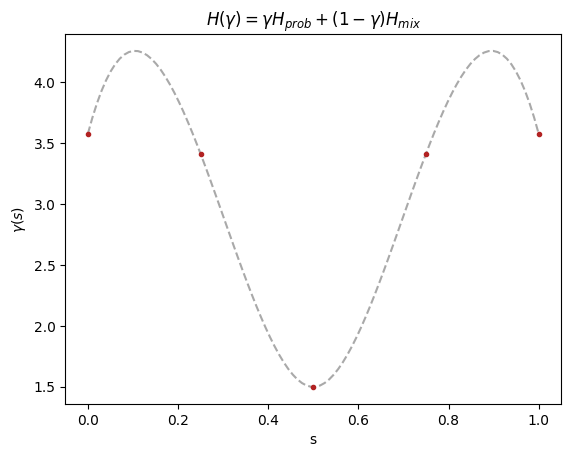

In [8]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [9]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': 1
          }

save_in_json(ra_exp, f'n{n}_{interpolator_kind}_BO.json')